# ECMWF Storm Data Processing

This notebook demos how to use the functions in `src/ocha_lens/datasources/ecmwf_storm.py`

In [1]:
from datetime import datetime

import geopandas as gpd
from shapely.geometry import LineString

import ocha_lens as lens

Access the `cxml` datasets saved to Azure blob and store as a dataframe. By default we'll get yesterday's data.

In [2]:
df_raw = lens.ecmwf_storm.load_hindcasts(
    start_date=datetime(2019, 12, 20), end_date=datetime(2020, 1, 15)
)

In [3]:
df_raw

,issued_time,provider,id,name,number,basin,leadtime,valid_time,latitude,longitude,pressure,wind_speed
0,2019-12-20 00:00:00+00:00,ecmf,2019122000_46N_1482E,NaN,37,Northwest Pacific,0,2019-12-20 00:00:00+00:00,6.0,146.6,1006,17.5
1,2019-12-20 00:00:00+00:00,ecmf,2019122000_46N_1482E,NaN,37,Northwest Pacific,6,2019-12-20 06:00:00+00:00,4.9,145.7,1002,17.5
2,2019-12-20 00:00:00+00:00,ecmf,2019122000_46N_1482E,NaN,37,Northwest Pacific,12,2019-12-20 12:00:00+00:00,4.8,144.9,1004,18.5
3,2019-12-20 00:00:00+00:00,ecmf,2019122000_46N_1482E,NaN,37,Northwest Pacific,18,2019-12-20 18:00:00+00:00,4.8,143.5,1001,19.5
4,2019-12-20 00:00:00+00:00,ecmf,2019122000_46N_1482E,NaN,37,Northwest Pacific,24,2019-12-21 00:00:00+00:00,4.8,143.5,1002,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...
186,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,156,2020-01-22 00:00:00+00:00,-14.5,43.9,1001,17.5
187,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,162,2020-01-22 06:00:00+00:00,-16.0,44.9,1001,18.0
188,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,168,2020-01-22 12:00:00+00:00,-16.7,45.6,1001,13.9
189,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,174,2020-01-22 18:00:00+00:00,-17.7,46.4,1005,11.8


In [4]:
df_raw[df_raw.id == "2020011512_00N_00E"]

,issued_time,provider,id,name,number,basin,leadtime,valid_time,latitude,longitude,pressure,wind_speed
14,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,70,Northeast Pacific,0,2020-01-15 12:00:00+00:00,7.4,-154.4,1004,13.9
15,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,70,Northeast Pacific,6,2020-01-15 18:00:00+00:00,8.1,-155.9,1005,15.4
16,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,70,Northeast Pacific,0,2020-01-15 12:00:00+00:00,44.8,-132.5,986,23.2
17,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,70,Northeast Pacific,6,2020-01-15 18:00:00+00:00,45.8,-130.1,979,25.7
18,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,70,Northeast Pacific,12,2020-01-16 00:00:00+00:00,47.0,-128.4,975,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...
186,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,156,2020-01-22 00:00:00+00:00,-14.5,43.9,1001,17.5
187,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,162,2020-01-22 06:00:00+00:00,-16.0,44.9,1001,18.0
188,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,168,2020-01-22 12:00:00+00:00,-16.7,45.6,1001,13.9
189,2020-01-15 12:00:00+00:00,ecmf,2020011512_00N_00E,NaN,75,Southwest Pacific,174,2020-01-22 18:00:00+00:00,-17.7,46.4,1005,11.8


Process this dataframe into the `storms` and `forecast_track` standards

In [5]:
df_storms = lens.ecmwf_storm.get_storms(df_raw)

In [6]:
df_storms

,name,number,storm_id,provider,season,genesis_basin
45,CLAUDIA,7,claudia_si_2020,ecmf,2020,SI
37,BLAKE,6,blake_si_2020,ecmf,2020,SI
31,EX-CALVINI,4,ex-calvini_si_2020,ecmf,2020,SI
28,CALVINIA,4,calvinia_si_2020,ecmf,2020,SI
27,SARAI,4,sarai_si_2020,ecmf,2020,SI
13,PHANFONE,37,phanfone_wp_2019,ecmf,2019,WP
14,SARAI,4,sarai_sp_2020,ecmf,2020,SP


In [7]:
gdf_tracks = lens.ecmwf_storm.get_tracks(df_raw)

In [10]:
gdf_tracks

,issued_time,provider,forecast_id,basin,leadtime,valid_time,pressure,wind_speed,storm_id,point_id,geometry
0,2019-12-20 00:00:00,ecmf,2019122000_46N_1482E,WP,0,2019-12-20 00:00:00,1006.0,17.5,NaN,615b68b3-6f7a-49d8-a8b1-d51a7b7a90e3,POINT (146.6 6)
1,2019-12-20 00:00:00,ecmf,2019122000_46N_1482E,WP,6,2019-12-20 06:00:00,1002.0,17.5,NaN,edf801a9-302f-4553-9d6a-ece093b784d5,POINT (145.7 4.9)
2,2019-12-20 00:00:00,ecmf,2019122000_46N_1482E,WP,12,2019-12-20 12:00:00,1004.0,18.5,NaN,50610575-2d1f-494c-92fc-1696d0a70974,POINT (144.9 4.8)
3,2019-12-20 00:00:00,ecmf,2019122000_46N_1482E,WP,18,2019-12-20 18:00:00,1001.0,19.5,NaN,8bda5990-730e-48a3-9a50-4bf48c337a42,POINT (143.5 4.8)
4,2019-12-20 00:00:00,ecmf,2019122000_46N_1482E,WP,24,2019-12-21 00:00:00,1002.0,15.4,NaN,20ea3435-452d-4993-bb00-8d7a161e18d5,POINT (143.5 4.8)
...,...,...,...,...,...,...,...,...,...,...,...
6750,2020-01-15 12:00:00,ecmf,2020011512_00N_00E,SI,156,2020-01-22 00:00:00,1001.0,17.5,NaN,92e1c62a-5bcf-432e-876c-2d43b4da419e,POINT (43.9 -14.5)
6751,2020-01-15 12:00:00,ecmf,2020011512_00N_00E,SI,162,2020-01-22 06:00:00,1001.0,18.0,NaN,673c6422-ab1a-4a21-af55-a2b2cdb527cb,POINT (44.9 -16)
6752,2020-01-15 12:00:00,ecmf,2020011512_00N_00E,SI,168,2020-01-22 12:00:00,1001.0,13.9,NaN,eb615d78-e88a-49c4-a28a-4e9fc3cfc4ad,POINT (45.6 -16.7)
6753,2020-01-15 12:00:00,ecmf,2020011512_00N_00E,SI,174,2020-01-22 18:00:00,1005.0,11.8,NaN,91e6f76c-7430-4771-9205-bf2af3fa0175,POINT (46.4 -17.7)


A very basic plot of the forecast tracks that we've defined as a storm.

<Axes: >

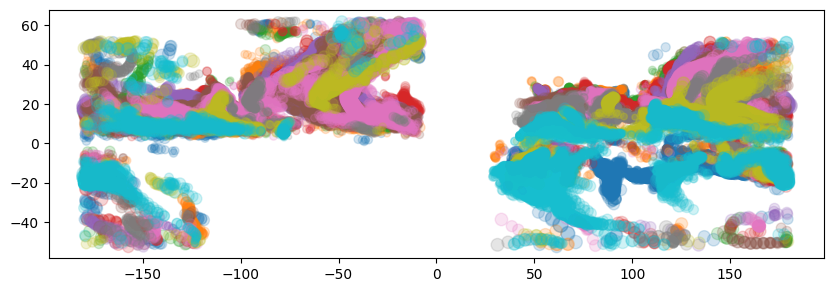

In [6]:
gdf_tracks.plot(
    column="forecast_id",
    markersize=gdf_tracks["wind_speed"] * 3,
    legend=False,
    figsize=(10, 8),
    alpha=0.2,
)

In [7]:
import ocha_stratus as stratus

engine = stratus.get_engine("dev", write=True)
with engine.connect() as conn:
    df_storms.to_sql("ecmwf_storms", conn, if_exists="append", schema="storms")
    gdf_tracks.to_postgis(
        "ecmwf_tracks_geo", conn, if_exists="append", schema="storms"
    )

And do a simple transformation of all points into tracks. We can see the IDs are unique as we'd expect here...

<Axes: >

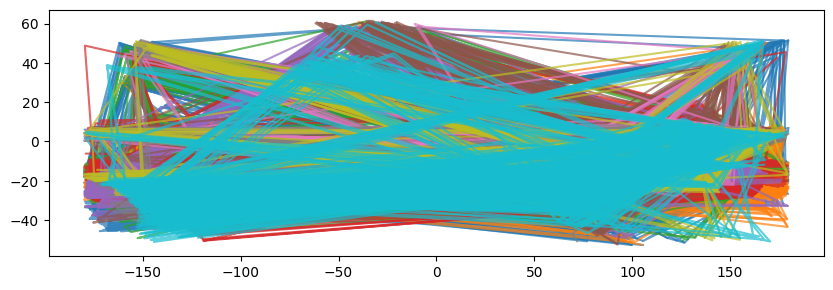

In [13]:
tracks = (
    gdf_tracks.sort_values("valid_time")
    .groupby(["forecast_id"])
    .apply(
        lambda x: LineString([(pt.x, pt.y) for pt in x.geometry]),
        include_groups=False,
    )
    .reset_index(name="geometry")
)


tracks_gdf = gpd.GeoDataFrame(tracks, crs=gdf_tracks.crs)
track_attrs = gdf_tracks.groupby("forecast_id").first().reset_index()
tracks_gdf = tracks_gdf.merge(
    track_attrs[["forecast_id", "basin"]], on="forecast_id"
)

tracks_gdf.plot(
    column="forecast_id",
    legend=False,
    alpha=0.7,
    figsize=(10, 10),
)

In [ ]:
df_storms = lens.ecmwf_storm.get_storms(df_raw)
df_raw["name"] = df_raw["name"].str.upper()
df_raw["basin"] = df_raw.apply(lens.ecmwf_storm._convert_basin, axis=1)
# TODO: Confirm how this performs in storms that cross basins
df_tracks = df_raw.merge(
    df_storms[["name", "season", "genesis_basin", "storm_id"]],
    left_on=["name", "basin"],
    right_on=["name", "genesis_basin"],
    how="left",
)
assert len(df_tracks) == len(df_raw)

df_tracks = df_tracks.drop(columns=["season", "name", "number"])
df_tracks = df_tracks.rename(columns={"id": "forecast_id"})

In [67]:
df_tracks.storm_id.unique()

array(['penny_sp_2019', nan, 'pabuk_wp_2019', 'mona_sp_2019',
       'penny_si_2019'], dtype=object)